__________________________

># About Project

__________________
    -> This Project is based on machine learning.
    
    -> In this project a model is trained using machine learning such that based on some parameters it can detect if the transaction is fraud or not.
    
    -> This model can be implemeted in real life in a manner that the credit card companies can detect whether the transaction occured was fraud or not.
    

    -> Using this model credit card companies will be able to take strict action against fraduds.

_____________________________

># About Dataset

______________________
    -> Dataset can be found at 'https://www.kaggle.com/mlg-ulb/creditcardfraud'.
    
    -> The datasets contains transactions made by credit cards in September 2013 by european cardholders.
    
    -> This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
    
    -> The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

_________________________

># From the Source

____________________

    -> It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, source cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
    
__________________________

># Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

># Importing Dataset

In [5]:
file=pd.read_csv("creditcard.csv")

In [6]:
df=pd.DataFrame(file)

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.shape

(284807, 31)

># Choose Target and Features as X and y

In [15]:
y=df['Class']
X=df[df.columns[0:-1]]

In [16]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [17]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


># Split the Data

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [36]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
245025,152576.0,-0.415981,1.473330,3.212240,4.489588,-0.407782,0.905268,-0.017830,0.218529,-1.845754,...,0.322923,0.112979,0.449971,-0.196496,0.475183,-0.116146,0.366631,0.151796,0.115053,11.38
36974,38754.0,-0.839386,0.213543,1.847523,0.727585,0.415022,-0.832852,0.201964,-0.003109,-0.255718,...,0.223753,-0.092291,-0.286450,-0.051954,0.428587,0.012749,0.347950,0.051746,0.114511,12.79
234675,148067.0,-1.158049,2.300558,-1.510286,2.633840,1.598278,-0.519403,1.219703,0.409184,-2.524073,...,-0.514614,0.555503,1.147892,-0.257771,0.633683,-0.095826,0.132610,-0.544722,0.106140,0.76
266133,162200.0,-1.466435,0.837760,-0.457787,-0.678832,0.146010,-0.263168,1.230332,0.165064,-0.308623,...,-0.363002,-0.149414,-0.288664,-0.490890,-0.452704,0.044418,-0.103091,-0.043320,-0.145005,183.71
114657,73568.0,-1.673677,1.231579,1.758262,1.262269,-1.305863,-0.237424,-0.618377,1.010990,-0.439671,...,0.030456,0.220018,0.368614,-0.187328,0.381358,0.194693,-0.173245,0.009060,-0.025353,45.00


># Scale the model due to variation in features

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_X_train=sc.fit_transform(X_train)

In [45]:
scaled_X_train

array([[ 1.21836673e+00, -2.12247045e-01,  8.95557504e-01, ...,
         3.74471538e-01,  3.50552977e-01, -3.08382840e-01],
       [-1.17996655e+00, -4.28520696e-01,  1.31347088e-01, ...,
         1.28278577e-01,  3.48891959e-01, -3.02751327e-01],
       [ 1.12335799e+00, -5.91291890e-01,  1.39736960e+00, ...,
        -1.33945203e+00,  3.23261191e-01, -3.50798912e-01],
       ...,
       [ 5.18454266e-01, -2.30250009e-01, -7.08226954e-01, ...,
         1.28866720e-01, -4.58726018e-01,  8.52347762e-01],
       [ 6.12451602e-01,  1.46402018e-01,  1.38251017e+00, ...,
         4.47299488e-01,  4.52288830e-02, -3.17129657e-01],
       [-2.07122571e-01, -7.25174462e-01,  8.82664499e-01, ...,
         8.41669762e-04,  1.29119844e-01, -3.15292426e-01]])

># Model Creation using Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
m=LogisticRegression()
m.fit(scaled_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

># Model Evaluation

In [48]:
scaled_X_test=sc.transform(X_test)

In [50]:
scaled_X_test

array([[-0.91651695, -1.4478187 ,  1.19511703, ..., -2.87152018,
        -1.6725394 , -0.29320571],
       [-0.73048187, -1.6873038 , -1.65195091, ...,  1.90035233,
         0.31008974,  0.02159983],
       [ 1.2587386 ,  1.17138483, -0.49515005, ..., -0.10963325,
        -0.20320788, -0.3406542 ],
       ...,
       [-0.88215029,  0.61879201, -0.48450713, ...,  0.07493164,
         0.02767894, -0.05029182],
       [ 1.51816366, -0.05898807,  0.4790639 , ...,  0.46003159,
        -0.25405233, -0.30650567],
       [-1.69180006,  0.59555014, -0.09675378, ..., -0.20293367,
        -0.03400467, -0.30211229]])

In [51]:
y_hat=m.predict(scaled_X_test)

In [54]:
y_hat[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [56]:
y_test.to_numpy()[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [65]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n',confusion_matrix(y_test,y_hat))

Confusion Matrix : 
 [[85294    11]
 [   56    82]]


In [61]:
from sklearn.metrics import accuracy_score
print("Accuracy :",round(accuracy_score(y_test,y_hat)*100,2),"%")

Accuracy : 99.92 %


### Accuracy is 99.92% But still our model cannot detect all frauds.
### Accuracy is high because the data is unbalanced as only .17% of transactions are fraud

In [66]:
from sklearn.metrics import classification_report
print("Classification Report : \n",classification_report(y_test,y_hat))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85305
           1       0.88      0.59      0.71       138

    accuracy                           1.00     85443
   macro avg       0.94      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



### Our Model is not that much good to predict fraud as it will guess only 59% of frauds out of total frauds

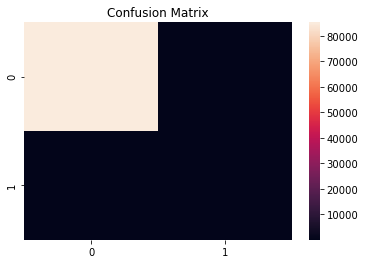

In [68]:
sns.heatmap(confusion_matrix(y_test,y_hat))
plt.title("Confusion Matrix")
plt.show()

># Deploy the Model

In [72]:
import pickle
with open('model.pkl','wb') as fp:
    pickle.dump(m,fp)